## Objetivos

Esta ayudantía tiene los siguientes objetivos:
- aprender conceptos básicos sobre _data wrangling_,
- conocer diferentes formatos: CSV, JSON, etc.
- generar _datasets_ artificiales,
- un poco de matplotlib.

## Advertencias

El siguiente tutorial asume que el estudiante viene con conocimientos de Python.


## Outline

- `Jupyter`
  - _Overview_ general
  - Atajos
- `pandas`
  - Principales funciones
  - Algo más avanzado
- `matplotlib`
  - Funciones básicas


# `Jupyter`

Antes de todo, haremos una rápido paseo por Jupyter Notebook,  
que es la herramienta que utilizaremos para este tutorial.

## ¿Qué es Jupyter Notebook?

Es una plataforma web para elaborar documentos escritos en Python.  

- Se pueden exportar documentos.

Para los que hicieron _Cálculo_, pueden pensar que Jupyter Notebook, en palabras simples, es _Maple para Python_.

## Celdas

Hay dos tipos principales de celdas: para escribir código en **Python** y para escribir _código_ en **Markdown**.  
Si es que no conoces la sintaxis de Markdown, revisa este [tutorial](
https://guides.github.com/features/mastering-markdown/).

La idea es ir ejecutando código en Python y luego explicarlo mediante el uso de Markdown.  
Esto nos permitirá generar una suerte de informe de nuestro trabajo.

## Atajos

Utilizar el teclado en vez del _mouse_ (o _mousepad_, o _touchpad_) ofrece una gran eficiencia.  
A continuación, dejaré una lista de los principales atajos.

### Modos

Pero antes, es interesante saber que existen dos modos: _command_.

#### Modo `command`

- Para correr una celda: **`Ctrl+Enter`**.
- Para correr una celda y pasar a la siguiente: **`Shift+Enter`**.
- Para correr una celda y crear una nueva abajo: **`Alt+Enter`**.

#### Modo `edit`

### ¿Quieres más atajos?

Para saber más, puedes apretar **`H`** (en modo **`command`**) para encontrar más información.

# Pandas

## Introducción

`pandas` es una librería construida sobre `numpy` (abreviación de _numerical Python_)  
que es la librería angular para la programación científica en Python.

## ¿Por qué usar `pandas`?

Si bien, podríamos guardar datos en las estructuras ofrecidas en Python —como listas, tuplas o diccionarios—,  
esto no es eficiente.

Importamos la librería `pandas`.

In [14]:
import pandas
from IPython.display import display

En `pandas`, existen diferentes estructuras de datos.  
Sin embargo, para esta ayudantía, veremos las dos principales: _series_ y _dataframes_.

### _Series_

Un _series_ puede ser pensado como una columna de datos.  
Lo más común, sería utilizar un _series_ para guardar observaciones sobre una variable.  
Por ejemplo, los diámetros de planetas del sistema solar.

In [73]:
diameter_list = (4879, 12104, 12756, 6792, 142984, 120536, 51118, 49528, 2370)
diameter_series = pandas.Series(diameter_list)

Imprimimamos esta serie para ver qué obtenemos.

In [74]:
diameter_series

0      4879
1     12104
2     12756
3      6792
4    142984
5    120536
6     51118
7     49528
8      2370
dtype: int64

Vemos que ahora tenemos una columna con los datos.  
Además, aparece una columna en la izquierda con los números del 0 al 8.  
Estos números son los índices del _series_.
Con ellos, podemos acceder a los elementos.

In [75]:
print("El primer elemento es: {}.".format(diameter_series[0]))

El primer elemento es: 4879.


Ahora, sería interesante poder los nombres de los planetas junto a su diametro.  
Las llaves no tienen por qué ser necesariamente enteros. Eso es el valor por _defecto_.  
Veamos cómo podemos asignar nuestros propios índices.

In [76]:
# Primero, definimos los nombres en una lista.
# Naturalmente, deben estar en el mismo orden que los diametros.
planet_names = ('Mercurio', 'Venus', 'Tierra', 'Marte', 'Júpiter', 'Saturno', 'Urano', 'Neptuno', 'Plutón')

# Ahora, lo asignamos como índices.
diameter_series.index = planet_names

Veamos qué obtuvimos.

In [77]:
diameter_series

Mercurio      4879
Venus        12104
Tierra       12756
Marte         6792
Júpiter     142984
Saturno     120536
Urano        51118
Neptuno      49528
Plutón        2370
dtype: int64

Muy bien.  
Ahora podemos llamarlos directamente por el nombre.

In [78]:
diameter_series['Mercurio']

4879

Este paso de crear el _series_ y asignarle los índices puede ser logrado de diferentes formas.  
Veamos algunas de ellas.

In [79]:
# a) Entregando un argumento al parámetro 'index'.
diameter_series = pandas.Series(diameter_list, index=planet_names)
diameter_series

Mercurio      4879
Venus        12104
Tierra       12756
Marte         6792
Júpiter     142984
Saturno     120536
Urano        51118
Neptuno      49528
Plutón        2370
dtype: int64

In [80]:
# b) Entregando directamente un diccionario.
planet_zip = zip(planet_names, diameter_list)  # la función 'zip' junta dos listas en una.
planet_dict = dict(planet_zip)
print(planet_dict)

# Y ahora, entregamos el diccionario como argumento.
# Ojo: la diferencia de este método es que como los diccionarios en Python no mantienen un orden,
# ==== entonces el _series_ aparece desordenado —de todas formas, los valores son correctos.
diameter_series = pandas.Series(planet_dict)
diameter_series

{'Venus': 12104, 'Júpiter': 142984, 'Neptuno': 49528, 'Marte': 6792, 'Mercurio': 4879, 'Tierra': 12756, 'Plutón': 2370, 'Urano': 51118, 'Saturno': 120536}


Júpiter     142984
Marte         6792
Mercurio      4879
Neptuno      49528
Plutón        2370
Saturno     120536
Tierra       12756
Urano        51118
Venus        12104
dtype: int64

Bueno, hasta ahora, el _series_ no ha sido más que una implementación diferente de `dict` para Python.  
Veamos qué podemos hacer con los valores.

## Seleccionar datos

El modo es muy similar al de Python.

In [88]:
diameter_series[0:3]

Júpiter     142984
Marte         6792
Mercurio      4879
dtype: int64

## Principales funciones

Veremos las siguientes funciones:
- `head`,
- `tail`,
- `count`,
- `mean`,
- `median`,
- `describe`,
- `sum`,
- `sort_values`.

Obtengamos los primeros tres datos con `head`.

In [172]:
diameter_series.head(3)

Júpiter     1.429840e+14
Marte       6.792000e+12
Mercurio    4.879000e+12
dtype: float64

Obtengamos los últimos dos.

In [171]:
diameter_series.tail(2)

Urano    5.111800e+13
Venus    1.210400e+13
dtype: float64

**Nota:** Por defecto, `head` y `tail` entregan cinco datos si es que no reciben parámetros.

In [173]:
diameter_series.head()

Júpiter     1.429840e+14
Marte       6.792000e+12
Mercurio    4.879000e+12
Neptuno     4.952800e+13
Plutón      2.370000e+12
dtype: float64

In [20]:
count = diameter_series.count()
print("Tenemos un total de {} planetas.".format(count))

Tenemos un total de 9 planetas.


In [33]:
mean = diameter_series.mean()
print("La media es de {:,.2f} kilómetros.".format(mean))
# ':,.2f' es un formato para ofrecer separador de miles
# y una precisión de dos decimales.

La media es de 44,785.22 kilómetros.


In [37]:
median = diameter_series.median()
print("La media es de {:,.2f} kilómetros.".format(median))

La media es de 12,756.00 kilómetros.


O si queremos un resumen ejecutivo...

In [81]:
diameter_series.describe()

count         9.000000
mean      44785.222222
std       52882.835414
min        2370.000000
25%        6792.000000
50%       12756.000000
75%       51118.000000
max      142984.000000
dtype: float64

In [174]:
diameter_series.sum()

403067000000000.0

## Operaciones

Es posible aplicar operaciones _element-wise_ en un _series_.  
En otras palabras, no es necesario utilizar un `for` para modificar todos los valores.  
Veamos algunos ejemplos...

In [104]:
diameter_series * 1000

Júpiter     7.149200e+10
Marte       3.396000e+09
Mercurio    2.439500e+09
Neptuno     2.476400e+10
Plutón      1.185000e+09
Saturno     6.026800e+10
Tierra      6.378000e+09
Urano       2.555900e+10
Venus       6.052000e+09
dtype: float64

Y casi como si fuera magia, todos los valores pasaron de kilómetros a metros.  
**Ojo:** esta operación no ocurre _in-place_; luego, el _series_ original sigue intacto.

In [108]:
diameter_series

Júpiter     1.429840e+14
Marte       6.792000e+12
Mercurio    4.879000e+12
Neptuno     4.952800e+13
Plutón      2.370000e+12
Saturno     1.205360e+14
Tierra      1.275600e+13
Urano       5.111800e+13
Venus       1.210400e+13
dtype: float64

Luego, si quisiéramos modificarlo _in place_, debemos asignarlo nuevamente.

In [107]:
diameter_series *= 1000
# que es lo mismo que...
# diameter_series = diameter_series * 1000

Veamos el _ratio_ con respecto a nuestro actual hogar.

In [115]:
diameter_series / diameter_series['Tierra']

Júpiter     11.209156
Marte        0.532455
Mercurio     0.382487
Neptuno      3.882722
Plutón       0.185795
Saturno      9.449357
Tierra       1.000000
Urano        4.007369
Venus        0.948887
dtype: float64

Ahora calculemos los volúmenes de los planetas.  
En Cálculo 2 (?), aprendimos que la fórmula del volumen es...
$$ V = 2 \pi r^2 $$
(Aunque, en Cálculo 3, vimos que se podía obtener directamente con el diámetro.)

In [113]:
import numpy
volume_series = 2 * numpy.pi * numpy.power(diameter_series / 2, 2)
volume_series

Júpiter     3.211403e+28
Marte       7.246282e+25
Mercurio    3.739224e+25
Neptuno     3.853199e+27
Plutón      8.823006e+24
Saturno     2.282199e+28
Tierra      2.555930e+26
Urano       4.104569e+27
Venus       2.301324e+26
dtype: float64

In [102]:
# acá nos dirá si es que cada valor es menor (o no) al promedio de la serie.
diameter_series < diameter_series.mean()

Júpiter     False
Marte        True
Mercurio     True
Neptuno     False
Plutón       True
Saturno     False
Tierra       True
Urano       False
Venus        True
dtype: bool

Ahora, ¿cómo hacemos si es que queremos hacer algo un poco más complejo?  
Digamos que queremos ver si es que los diametros son números primos.  
(No, no tiene ningún sentido.)

In [144]:
def is_prime(number):
    """
    Dice si 'number' es primo o no.
    """
    
    # primero, sacamos a los números pares.
    if number % 2 == 0 and number > 2: 
        return False
    
    # luego, iteramos
    for n in range(3, math.ceil(number ** (1/2)), 2):
        if number % n == 0:
            return False
    return True

is_prime(42)

False

Intentemos aplicar la función directamente.

In [128]:
is_prime(diameter_series)

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

Vemos que nos tira error, porque nuestra función `is_prime` está esperando un `int` y no un _series_.  
Sin embargo, hay otra forma: la función `apply`.

In [132]:
diameter_series.apply(is_prime)

Júpiter     False
Marte       False
Mercurio    False
Neptuno     False
Plutón      False
Saturno     False
Tierra      False
Urano       False
Venus       False
dtype: bool

Notemos, además, que `apply` también recibe funciones que ya se ejecutan de forma _element-wise_.  
Por ejemplo, `numpy.isfinite` es _element-wise_.

In [156]:
numpy.isfinite(diameter_series)

Júpiter     True
Marte       True
Mercurio    True
Neptuno     True
Plutón      True
Saturno     True
Tierra      True
Urano       True
Venus       True
dtype: bool

In [157]:
diameter_series.apply(numpy.isfinite)

Júpiter     True
Marte       True
Mercurio    True
Neptuno     True
Plutón      True
Saturno     True
Tierra      True
Urano       True
Venus       True
dtype: bool

Podemos notar entonces que este tipo de operaciones nos entrega un _series_ de valores booleanos.  
Esto es clave para entender lo que haremos a continuación: filtrar datos.

## Filtrar

Veamos un rápido ejemplo: filtremos todos los planetas que tengan un diámetro menor que la Tierra.

In [116]:
diameter_series[diameter_series < diameter_series['Tierra']]

Marte       6.792000e+12
Mercurio    4.879000e+12
Plutón      2.370000e+12
Venus       1.210400e+13
dtype: float64

¿Cómo funciona esto por detrás?  
Veamos que entrega la expresión interna.

In [158]:
diameter_series < diameter_series['Tierra']

Júpiter     False
Marte        True
Mercurio     True
Neptuno     False
Plutón       True
Saturno     False
Tierra      False
Urano       False
Venus        True
dtype: bool

Nuevamente tenemos valores booleanos. Luego, cada uno de ellos se aplica al _series_.  
Así, si es `True`, el valor se queda; si es `False`, el valor se elimina.  
Veamos otro ejemplo.

In [166]:
boolean_indexing = [False, True, False, False, False, False, False, False, False]
diameter_series[boolean_indexing]

Marte    6.792000e+12
dtype: float64

Aquí sólo dejamos un único valor con `True`, luego recibimos un _series_ con un único elemento.

## _Dataframes_

Los _dataframes_ son la extensión natural de un _series_, ya que puede ser visto como un conjunto de _series_.  
Siguiendo con el ejemplo de los planetas,
podríamos crear un _dataframe_ si es que tuvieramos más atributos de cada planeta.  
De esta forma, leamos un CSV con más atributos.

In [40]:
full_planet = pandas.read_csv('planett.csv', index_col=0)
# full_planet.index
full_planet

,Mass (10^24kg),Diameter (km),Density (kg/m3),Gravity (m/s2),Escape Velocity (km/s),Rotation Period (hours),Length of Day (hours),Distance from Sun (106 km),Perihelion (10^6 km),Aphelion (10^6 km),Orbital Period (days),Orbital Velocity (km/s),Orbital Inclination (degrees),Orbital Eccentricity,Obliquity to Orbit (degrees),Mean Temperature (C)
MERCURY,0.3300,4879.0,5427.0,3.7,4.3,1407.6,4222.6,57.900,46.000,69.800,88.0,47.4,7.0,0.205,0.01,167.0
VENUS,4.8700,12104.0,5243.0,8.9,10.4,-5832.5,2802.0,108.200,107.500,108.900,224.7,35.0,3.4,0.007,177.40,464.0
EARTH,5.9700,12756.0,5514.0,9.8,11.2,23.9,24.0,149.600,147.100,152.100,365.2,29.8,0.0,0.017,23.40,15.0
MOON,0.0730,3475.0,3340.0,1.6,2.4,655.7,708.7,0.384,0.363,0.406,27.3,1.0,5.1,0.055,6.70,-20.0
MARS,0.6420,6792.0,3933.0,3.7,5.0,24.6,24.7,227.900,206.600,249.200,687.0,24.1,1.9,0.094,25.20,-65.0
JUPITER,1898.0000,142984.0,1326.0,23.1,59.5,9.9,9.9,778.600,740.500,816.600,4331.0,13.1,1.3,0.049,3.10,-110.0
SATURN,568.0000,120536.0,687.0,9.0,35.5,10.7,10.7,1433.500,1352.600,1514.500,10747.0,9.7,2.5,0.057,26.70,-140.0
URANUS,86.8000,51118.0,1271.0,8.7,21.3,-17.2,17.2,2872.500,2741.300,3003.600,30589.0,6.8,0.8,0.046,97.80,-195.0
NEPTUNE,102.0000,49528.0,1638.0,11.0,23.5,16.1,16.1,4495.100,4444.500,4545.700,59800.0,5.4,1.8,0.011,28.30,-200.0
PLUTO,0.0146,2370.0,2095.0,0.7,1.3,-153.3,153.3,5906.400,4436.800,7375.900,90560.0,4.7,17.2,0.244,122.50,-225.0


### Selección

Primero, veamos cómo funciona la selección en los _dataframes_.

#### Selección de columnas

- `dataframe[colname]`

#### Selección de filas

- `dataframe.loc[...]`
- `dataframe.iloc[...]`

In [55]:
# seleccionemos la columna.
display(full_planet['Diameter (km)'])

# loc (location)

display(full_planet.loc['JUPITER'])           # una etiqueta.
display(full_planet.loc['JUPITER':'URANUS'])  # ojo: ambos están incluidos!
display(full_planet.loc[['JUPITER', 'MOON']]) # lista de etiquetas.

# iloc (integer-based location)

display(full_planet.iloc[2])          # la tercera fila.
display(full_planet.iloc[2:5])        # de la tercera a la quinta fila.
display(full_planet.iloc[[2, 3, 6]])  # la tercera, la cuarta y la séptima.

MERCURY      4879.0
VENUS       12104.0
EARTH       12756.0
MOON         3475.0
MARS         6792.0
JUPITER    142984.0
SATURN     120536.0
URANUS      51118.0
NEPTUNE     49528.0
PLUTO        2370.0
Name: Diameter (km), dtype: float64

Mass (10^24kg)                     1898.000
Diameter (km)                    142984.000
Density (kg/m3)                    1326.000
Gravity (m/s2)                       23.100
Escape Velocity (km/s)               59.500
Rotation Period (hours)               9.900
Length of Day (hours)                 9.900
Distance from Sun (106 km)          778.600
Perihelion (10^6 km)                740.500
Aphelion (10^6 km)                  816.600
Orbital Period (days)              4331.000
Orbital Velocity (km/s)              13.100
Orbital Inclination (degrees)         1.300
Orbital Eccentricity                  0.049
Obliquity to Orbit (degrees)          3.100
Mean Temperature (C)               -110.000
Name: JUPITER, dtype: float64

,Mass (10^24kg),Diameter (km),Density (kg/m3),Gravity (m/s2),Escape Velocity (km/s),Rotation Period (hours),Length of Day (hours),Distance from Sun (106 km),Perihelion (10^6 km),Aphelion (10^6 km),Orbital Period (days),Orbital Velocity (km/s),Orbital Inclination (degrees),Orbital Eccentricity,Obliquity to Orbit (degrees),Mean Temperature (C)
JUPITER,1898.0,142984.0,1326.0,23.1,59.5,9.9,9.9,778.6,740.5,816.6,4331.0,13.1,1.3,0.049,3.1,-110.0
SATURN,568.0,120536.0,687.0,9.0,35.5,10.7,10.7,1433.5,1352.6,1514.5,10747.0,9.7,2.5,0.057,26.7,-140.0
URANUS,86.8,51118.0,1271.0,8.7,21.3,-17.2,17.2,2872.5,2741.3,3003.6,30589.0,6.8,0.8,0.046,97.8,-195.0


,Mass (10^24kg),Diameter (km),Density (kg/m3),Gravity (m/s2),Escape Velocity (km/s),Rotation Period (hours),Length of Day (hours),Distance from Sun (106 km),Perihelion (10^6 km),Aphelion (10^6 km),Orbital Period (days),Orbital Velocity (km/s),Orbital Inclination (degrees),Orbital Eccentricity,Obliquity to Orbit (degrees),Mean Temperature (C)
JUPITER,1898.000,142984.0,1326.0,23.1,59.5,9.9,9.9,778.600,740.500,816.600,4331.0,13.1,1.3,0.049,3.1,-110.0
MOON,0.073,3475.0,3340.0,1.6,2.4,655.7,708.7,0.384,0.363,0.406,27.3,1.0,5.1,0.055,6.7,-20.0


Mass (10^24kg)                       5.970
Diameter (km)                    12756.000
Density (kg/m3)                   5514.000
Gravity (m/s2)                       9.800
Escape Velocity (km/s)              11.200
Rotation Period (hours)             23.900
Length of Day (hours)               24.000
Distance from Sun (106 km)         149.600
Perihelion (10^6 km)               147.100
Aphelion (10^6 km)                 152.100
Orbital Period (days)              365.200
Orbital Velocity (km/s)             29.800
Orbital Inclination (degrees)        0.000
Orbital Eccentricity                 0.017
Obliquity to Orbit (degrees)        23.400
Mean Temperature (C)                15.000
Name: EARTH, dtype: float64

,Mass (10^24kg),Diameter (km),Density (kg/m3),Gravity (m/s2),Escape Velocity (km/s),Rotation Period (hours),Length of Day (hours),Distance from Sun (106 km),Perihelion (10^6 km),Aphelion (10^6 km),Orbital Period (days),Orbital Velocity (km/s),Orbital Inclination (degrees),Orbital Eccentricity,Obliquity to Orbit (degrees),Mean Temperature (C)
EARTH,5.970,12756.0,5514.0,9.8,11.2,23.9,24.0,149.600,147.100,152.100,365.2,29.8,0.0,0.017,23.4,15.0
MOON,0.073,3475.0,3340.0,1.6,2.4,655.7,708.7,0.384,0.363,0.406,27.3,1.0,5.1,0.055,6.7,-20.0
MARS,0.642,6792.0,3933.0,3.7,5.0,24.6,24.7,227.900,206.600,249.200,687.0,24.1,1.9,0.094,25.2,-65.0


,Mass (10^24kg),Diameter (km),Density (kg/m3),Gravity (m/s2),Escape Velocity (km/s),Rotation Period (hours),Length of Day (hours),Distance from Sun (106 km),Perihelion (10^6 km),Aphelion (10^6 km),Orbital Period (days),Orbital Velocity (km/s),Orbital Inclination (degrees),Orbital Eccentricity,Obliquity to Orbit (degrees),Mean Temperature (C)
EARTH,5.970,12756.0,5514.0,9.8,11.2,23.9,24.0,149.600,147.100,152.100,365.2,29.8,0.0,0.017,23.4,15.0
MOON,0.073,3475.0,3340.0,1.6,2.4,655.7,708.7,0.384,0.363,0.406,27.3,1.0,5.1,0.055,6.7,-20.0
SATURN,568.000,120536.0,687.0,9.0,35.5,10.7,10.7,1433.500,1352.600,1514.500,10747.0,9.7,2.5,0.057,26.7,-140.0


Pero tanto `loc` como `iloc` pueden recibir un segundo parámetro,  
ya que funcionan seleccionando con el orden`[fila, columna]`.  
Sin embargo, cuando se omite la columna, simplemente toma todo.

In [60]:
# ambos son equivalentes.
display(full_planet.loc['EARTH'])
display(full_planet.loc['EARTH', :])

Mass (10^24kg)                       5.970
Diameter (km)                    12756.000
Density (kg/m3)                   5514.000
Gravity (m/s2)                       9.800
Escape Velocity (km/s)              11.200
Rotation Period (hours)             23.900
Length of Day (hours)               24.000
Distance from Sun (106 km)         149.600
Perihelion (10^6 km)               147.100
Aphelion (10^6 km)                 152.100
Orbital Period (days)              365.200
Orbital Velocity (km/s)             29.800
Orbital Inclination (degrees)        0.000
Orbital Eccentricity                 0.017
Obliquity to Orbit (degrees)        23.400
Mean Temperature (C)                15.000
Name: EARTH, dtype: float64

Mass (10^24kg)                       5.970
Diameter (km)                    12756.000
Density (kg/m3)                   5514.000
Gravity (m/s2)                       9.800
Escape Velocity (km/s)              11.200
Rotation Period (hours)             23.900
Length of Day (hours)               24.000
Distance from Sun (106 km)         149.600
Perihelion (10^6 km)               147.100
Aphelion (10^6 km)                 152.100
Orbital Period (days)              365.200
Orbital Velocity (km/s)             29.800
Orbital Inclination (degrees)        0.000
Orbital Eccentricity                 0.017
Obliquity to Orbit (degrees)        23.400
Mean Temperature (C)                15.000
Name: EARTH, dtype: float64

In [68]:
display(full_planet.loc['EARTH', 'Orbital Eccentricity'])

0.017000000000000001

In [70]:
display(full_planet.iloc[1, 2:5])

Density (kg/m3)           5243.0
Gravity (m/s2)               8.9
Escape Velocity (km/s)      10.4
Name: VENUS, dtype: float64

Pero también se puede hacer _boolean indexing_.  
Seleccionemos los planetas con mayor masa que nuestro hogar.

In [74]:
full_planet[full_planet['Mass (10^24kg)'] > full_planet['Mass (10^24kg)']['EARTH']]

,Mass (10^24kg),Diameter (km),Density (kg/m3),Gravity (m/s2),Escape Velocity (km/s),Rotation Period (hours),Length of Day (hours),Distance from Sun (106 km),Perihelion (10^6 km),Aphelion (10^6 km),Orbital Period (days),Orbital Velocity (km/s),Orbital Inclination (degrees),Orbital Eccentricity,Obliquity to Orbit (degrees),Mean Temperature (C)
JUPITER,1898.0,142984.0,1326.0,23.1,59.5,9.9,9.9,778.6,740.5,816.6,4331.0,13.1,1.3,0.049,3.1,-110.0
SATURN,568.0,120536.0,687.0,9.0,35.5,10.7,10.7,1433.5,1352.6,1514.5,10747.0,9.7,2.5,0.057,26.7,-140.0
URANUS,86.8,51118.0,1271.0,8.7,21.3,-17.2,17.2,2872.5,2741.3,3003.6,30589.0,6.8,0.8,0.046,97.8,-195.0
NEPTUNE,102.0,49528.0,1638.0,11.0,23.5,16.1,16.1,4495.1,4444.5,4545.7,59800.0,5.4,1.8,0.011,28.3,-200.0


## _Panels_

Finalmente, el _panel_ es la extensión natural del _dataframe_.  
En otras palabras, un _panel_ es a una _dataframe_ lo que un _dataframe_ es a un _series_.  
No será visto en esta ayudantía, ya que es simplemente una generalización y no será usado.

# CSV vs. JSON

Hasta ahora, sólo hemos trabajo con el formato CSV. Pero también existen otros formatos.  
Entre los más conocidos, podemos nombrar: **CSV**, TSV, XML, **JSON**, YAML.  
Podemos agrupar estos formatos en dos categorías: los de tipo _tabla_ o los de tipo _árbol_.  
Cualquier _dataset_ podría ser representado en cualquiera de estos formatos,
pero siempre habrá un _trade-off_.  
Hay que tener claro que **ninguno es mejor que otro**: no hay un _martillo dorado_.

Por lo tanto, si el _dataset_ es de _naturaleza tabular_,
CSV probablemente será una mejor opción que usar JSON.  
Esto se debe a que no tendremos que repetir las llaves en el archivo, una y otra vez.  
Por lo tanto, para _datasets rectangulares_, CSV debería tener un mejor _performance_ que JSON.  
Veamos un ejemplo.

In [176]:
pandas.read_csv('planet.csv')

,name,distance_from_sun,mass
0,Mercurio,57909175.0,0.33
1,Venus,NaN,NaN
2,Tierra,NaN,NaN
3,Marte,NaN,NaN
4,Júpiter,NaN,NaN


¿Cómo podríamos representar esto en un JSON?

`planet.csv`

```csv
name,distance_from_sun,mass
Mercurio,57909175,0.33
Venus,,4.87
Tierra,,5.97
Marte,,0.642
```

```json
[
    {
        "name": "Mercurio",
        "mass": 0.33,
        "distance_from_sun":
    }, {
        "name": "Venus",
        "mass": 4.87,
        "distance_from_sun":
    }, {
        "name": "Tierra",
        "mass": 5.97,
        "distance_from_sun":
    }, {
        "name": "Marte",
        "mass": 0.642,
        "distance_from_sun":
    }
]
```

Vemos que se repiten las llaves por cada dato nuevo.  
Luego, para algo simple, JSON podría ser considerado como un formato ineficiente.

## Generar _datasets_

Para generar un _dataset_ artificial, utilizaremos las funciones que nos ofrece `numpy`.

In [1]:
# Importamos la librería _numpy_.
import numpy
from IPython.display import display

Partamos por lo más simple: datos desde una distribución uniforme entre 0 y 1.  
Para esto, `numpy` no sólo nos ofrece una forma de lograr esto, sino... cuatro.
- `numpy.random.random_sample`
- `numpy.random.random`
- `numpy.random.ranf`
- `numpy.random.sample`

Los últimos tres simplemente llaman al primer método.

In [2]:
display(numpy.random.random_sample)
display(numpy.random.random)
display(numpy.random.ranf)
display(numpy.random.sample)

<function RandomState.random_sample>

<function RandomState.random_sample>

<function RandomState.random_sample>

<function RandomState.random_sample>

Usemos entonces esta función.  
Generemos veinte datos aleatorios de intervalo `[0, 1)`.

In [3]:
SIZE = 20
# entregamos el tamaño del 'ndarray' que queremos fabricar.
numpy.random.random(SIZE)

array([ 0.91318818,  0.65374006,  0.29519193,  0.71688723,  0.71685812,
        0.50523542,  0.70538865,  0.8286971 ,  0.24227895,  0.49363939,
        0.83456159,  0.55670626,  0.77342692,  0.35890006,  0.79484488,
        0.88915194,  0.38087787,  0.35287447,  0.31078418,  0.41702572])

Pero también podemos entregarles listas de enteros.  
Esto nos sirve para generar datos en más dimensiones.  
Por ejemplo, si entregamos una tupla de dos números,  
entonces obtendremos una matriz de números aleatorios.   
De la misma forma, si entregamos una 3-tupla de números,  
obtendremos _una caja de zapatos_ con números.  
Y así, al infinito y más allá...

In [4]:
SIZE_ = (3, 5, 2)
numpy.random.random(SIZE_)

array([[[ 0.1390982 ,  0.2012749 ],
        [ 0.16329384,  0.06666804],
        [ 0.58982779,  0.94207461],
        [ 0.2140667 ,  0.29904582],
        [ 0.53899557,  0.73673093]],

       [[ 0.98124971,  0.15437013],
        [ 0.59764236,  0.96777141],
        [ 0.29317517,  0.23969726],
        [ 0.84583703,  0.8434857 ],
        [ 0.30111534,  0.16424641]],

       [[ 0.14800657,  0.85717907],
        [ 0.3846673 ,  0.70271613],
        [ 0.27286117,  0.83530114],
        [ 0.23616631,  0.16742024],
        [ 0.64461029,  0.7771685 ]]])

**ProTip™:** como azúcar sintáctico, `numpy` también ofrece `numpy.random.rand`,  
que genera lo mismo, sólo que no recibe una tupla, sino cada dimensión como entero.

In [5]:
numpy.random.rand(3, 5, 2)

array([[[ 0.87707224,  0.92981279],
        [ 0.19482878,  0.02871821],
        [ 0.75563848,  0.35675922],
        [ 0.95755281,  0.48969424],
        [ 0.80269638,  0.58978013]],

       [[ 0.31106089,  0.33319937],
        [ 0.66135936,  0.25461762],
        [ 0.60555989,  0.8302981 ],
        [ 0.46866982,  0.53859425],
        [ 0.13381076,  0.68664964]],

       [[ 0.86242625,  0.02693664],
        [ 0.5456079 ,  0.65171151],
        [ 0.75129163,  0.99775566],
        [ 0.76893333,  0.71175763],
        [ 0.9639042 ,  0.22121439]]])

Muy bonito, pero... ¿cómo hacemos para cambiar el intervalo?  
Muy fácil, simplemente basta hacer un _cambio de distribución_.  
Por ejemplo, digamos que queremos números entre [0, 42).  
Para esto, si tenemos un generador uniforme estándar U(0,1),
sólo basta con multiplicar por 42.

In [6]:
42 * numpy.random.random(SIZE)

array([ 28.11263655,  28.72991313,  12.5369133 ,  20.89285675,
         8.37015362,  25.30022764,  19.3148054 ,  12.91154446,
        33.86040209,   1.04201221,  22.37591381,  27.73362018,
         6.20663226,  18.32279619,  29.71136006,   9.98006004,
         0.81770169,  28.51354661,  30.6148176 ,   0.15167896])

Generalizando este método, si queremos obtener datos uniformes entres [0, K)  
tenemos que...
$$ U(0,K) = K \cdot U(0,1) $$

¿Y si ahora queremos generar notas, es decir, números entre 1 y 7?  
Bueno, podríamos hacerlo mismo con K = 6, y luego sumarle uno a cada nota.

In [7]:
grades = 1 + (6 * numpy.random.random(SIZE))
grades

array([ 4.03083752,  5.31227952,  6.86787118,  5.37202043,  3.82336369,
        4.46695502,  5.74429535,  4.57428445,  5.82724035,  4.98181075,
        5.36685578,  2.16379996,  2.92345374,  1.63869107,  6.72617408,
        2.41735202,  2.80573671,  2.20147301,  3.17396295,  5.02423475])

Calculemos algunas estadísticas simples.

In [8]:
print("La nota mínima del curso fue: {:.2f}".format(grades.min()))
print("La nota máxima del curso fue: {:.2f}".format(grades.max()))
print("El promedio del curso fue: {:.2f}".format(grades.mean()))

La nota mínima del curso fue: 1.64
La nota máxima del curso fue: 6.87
El promedio del curso fue: 4.27


¿Pero cómo hacemos ahora si es que queremos datos entre -273 y 100?  
Aplicando la misma intuición, vemos que el rango del intervalo es de 373  
y a que a todos los números deberíamos restarles 273, para hacer el _shift_.  
Por lo tanto, formalizando esto, llegamos a esta mayor generalización:  
$$ U(a,b) = a + (b - a) \cdot U(0,1) $$

In [9]:
A = -273
B =  100
A + (B - A) * numpy.random.random(SIZE)

array([-257.1078897 , -260.85907474, -253.97359733, -208.90887518,
       -174.55524062,  -96.60976726,   70.69515236,   88.74692346,
        -72.62205339,   -7.1311679 , -204.10588208,   74.5899634 ,
       -173.9270131 , -222.90127056,  -65.01896837,  -77.13356214,
         -1.37970575,  -62.80704791, -265.87400934,  -74.05707493])

Y para que esto sea un poco más creíble...

In [10]:
print("El mínimo es: {:.3f}".format(A + (B - A) * numpy.random.random(1000).min()))
print("El máximo es: {:.3f}".format(A + (B - A) * numpy.random.random(1000).max()))

El mínimo es: -272.896
El máximo es: 99.992


Digamos ahora que queremos generar enteros

Ahora bien, si queremos generar distribuciones más complejas,  
podemos echar un vistazo por [acá](https://docs.scipy.org/doc/numpy/reference/routines.random.html#distributions).

En este caso, usaremos una distribución normal.

In [11]:
numpy.random.normal()

-1.037769965123754

Si es que no le damos los parámetros (media, desviación estándar y tamaño de muestra)  
`numpy`, por defecto, entregará una única muestra sacada de una normal estándar.

In [12]:
# loc   --> media
# scale --> desviación estándar
# size  --> tamaño de la muestra (igual que con )
LOC   = 3.5
SCALE = 0.8
SIZE  = 5
numpy.random.normal(loc=LOC, scale=SCALE, size=SIZE)

array([ 3.78259583,  3.30596912,  4.07323801,  4.34660431,  3.12314982])

Con esto que aprendimos, hagamos algo más concreto.  
Generemos una base de datos sintéticos de personas con ciertos atributos.

In [15]:
N_DATA = 5000
def male_or_female(datum):
    if datum <= 48:
        return 'M'
    else:
        return 'F'

# o de forma más sucinta.
def male_or_female(datum):
    return 'M' if datum <= 48 else 'F'

# o de forma más sucinta, usando _lambda functions_.
male_or_female = lambda datum: 'M' if datum <= 48 else 'F'

# género
sex = pandas.Series(numpy.random.randint(low=0, high=100, size=N_DATA), name='sex')
sex = sex.apply(male_or_female)

# edad
age = pandas.Series(numpy.random.normal(loc=35, scale=22, size=N_DATA), name='age').astype(int)
age

0        7
1       52
2       30
3       44
4       53
5        7
6       33
7       34
8       25
9       39
10      37
11      -6
12      54
13      11
14      16
15      65
16      37
17      -1
18      44
19     -51
20      62
21      54
22       9
23      40
24      26
25       1
26      36
27      44
28      36
29      -3
        ..
4970    33
4971    14
4972    36
4973    16
4974    28
4975    57
4976    37
4977    16
4978    54
4979   -14
4980    50
4981    -5
4982    63
4983   -19
4984    20
4985     7
4986    28
4987    34
4988    24
4989     6
4990    25
4991    21
4992    60
4993    34
4994    52
4995    26
4996    23
4997     5
4998    15
4999    31
Name: age, dtype: int64

Veamos el rango que obtenemos.

In [16]:
display(age.mean())
display(age.min())
display(age.max())

34.711199999999998

-51

105

Bueno, claramente, tenemos un problema, porque no deberían haber personas con edades negativas,  
ni gente tan longeva.  
Tenemos que arreglarlo, pero primero... juntemos esto en un _dataframe_.

(**Nota:** pudimos haber arreglado esto usando una distribución normal truncada que ofrece `scipy`;  
sin embargo, para efectos pedagógicos, haremos esto _artesanalmente_ para poner en práctica lo recién aprendido.)

In [17]:
chilean_people = pandas.concat([sex, age], axis=1)
chilean_people

,sex,age
0,M,7
1,M,52
2,F,30
3,F,44
4,F,53
5,M,7
6,F,33
7,F,34
8,M,25
9,M,39


Ahora sí, trunquemos las edades con valores razonables.

In [18]:
chilean_people = chilean_people[(0 <= chilean_people.age) & (chilean_people.age <= 110)]
display(chilean_people.age.mean())
display(chilean_people.age.min())
display(chilean_people.age.max())

37.015575668280363

0

105

Finamente, agreguemos un tercer atributo: la altura de la persona.  
Esta vez, generemos este valor de forma dependiente al género de la persona:  
ya que la estatura de un hombre es mayor a la de una mujer.

(Fuente: https://en.wikipedia.org/wiki/List_of_average_human_height_worldwide)

In [19]:
def get_height(sex):
    loc, scale = (157, 10) if sex == 'F' else (171, 12)
    return numpy.random.normal(loc, scale)

# casos de prueba
# pandas.Series([get_height('F') for _ in range(20)]).mean()
# pandas.Series([get_height('M') for _ in range(20)]).mean()

new_column = {'height_cm': chilean_people.sex.apply(get_height).astype(int)}
# esto es lo mismo
# chilean_people = chilean_people.assign(height_cm=chilean_people.sex.apply(get_height).astype(int))
chilean_people = chilean_people.assign(**new_column)
chilean_people

,sex,age,height_cm
0,M,7,163
1,M,52,191
2,F,30,153
3,F,44,149
4,F,53,160
5,M,7,160
6,F,33,157
7,F,34,166
8,M,25,185
9,M,39,189


Miremos si es que funcionó...

In [20]:
print("Mujeres:")
print("========")
display(chilean_people[chilean_people.sex == 'F'].height_cm.max())
display(chilean_people[chilean_people.sex == 'F'].height_cm.min())
display(chilean_people[chilean_people.sex == 'F'].height_cm.mean())

print("Hombres:")
print("========")
display(chilean_people[chilean_people.sex == 'M'].height_cm.max())
display(chilean_people[chilean_people.sex == 'M'].height_cm.min())
display(chilean_people[chilean_people.sex == 'M'].height_cm.mean())

Mujeres:


191

119

156.21918941273779

Hombres:


212

135

170.27046720960138

Todo en orden.

Ahora, construyamos algunos gráficos simples para visualizar los datos generados.  
Para esto, utilizaremos la librería `matplotlib`.

In [26]:
# esto es para que el gráfico aparezca en el _notebook_.
%matplotlib inline
import matplotlib.pyplot as plt

In [66]:
chilean_people.age.value_counts().count()

103

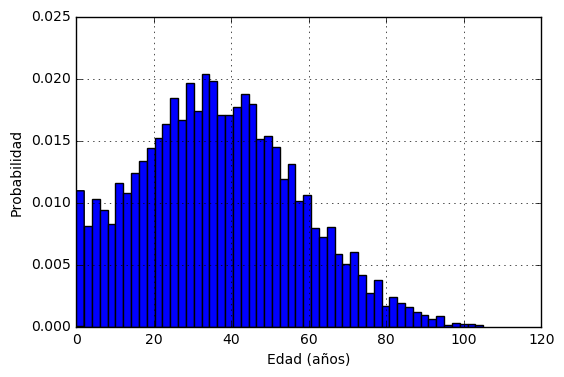

In [151]:
# como primer argumento, entregamos el dataset.
# luego, entregamos el número de _bins_,
# ya que tenemos casi 5.000 datos;
# luego, tenemos que agruparlos en una cierta cantidad de _bins_.
BINS = 52
# normed sirve para decir si es que queremos el eje y normalizado,
# como una distribución de probabilidad.
NORMED = True
plt.hist(chilean_people.age, bins=BINS, normed=NORMED)
plt.xlabel('Edad (años)')
plt.ylabel('Probabilidad')
plt.grid(True)
plt.show()

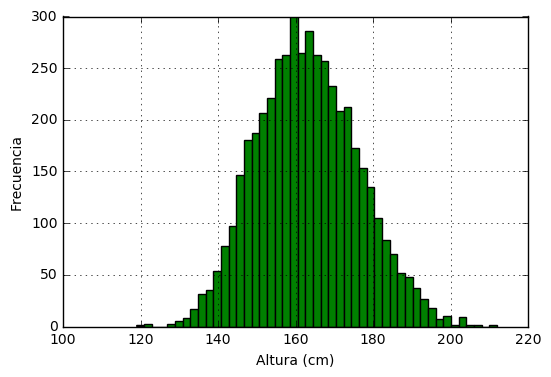

In [182]:
height = chilean_people.height_cm
# en vez de entregarle un entero al número de _bins_,
# le daremos una secuencia
BINS = numpy.linspace(height.min(), height.max(), 48)
plt.hist(height, bins=BINS, color='green')
plt.xlabel('Altura (cm)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Ahora, lo mismo, pero por género.

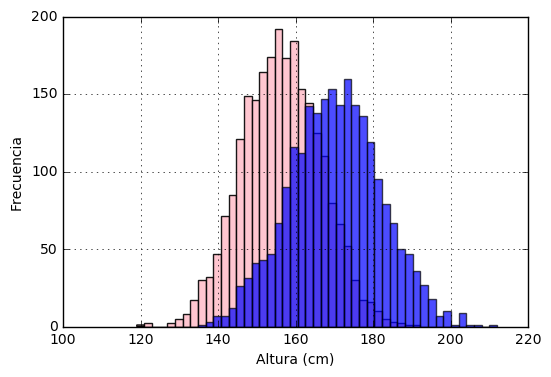

In [181]:
height_f = chilean_people[chilean_people.sex == 'F'].height_cm
height_m = chilean_people[chilean_people.sex == 'M'].height_cm

plt.hist(height_f, bins=BINS, color='pink', alpha=0.90)
plt.hist(height_m, bins=BINS, color='blue', alpha=0.70)
plt.xlabel('Altura (cm)')
plt.ylabel('Frecuencia')
plt.grid(True)
plt.show()

Por último, guardemos este _dataset_ en un archivo CSV.

In [21]:
chilean_people.to_csv('chilean.csv', index=False)

Ejercicios:

- generar gráficos de edad y altura
- histogramas por sexo